In [2]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import pandas_datareader
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as ts
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import statsmodels.api as sm
import scipy
from statsmodels.stats.diagnostic import acorr_ljungbox as lb

style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
exchangeFile = 'D:/document/统计建模大赛/数据/CNY_USD.csv'
exchange = pd.read_csv(exchangeFile, index_col=0, parse_dates=[0])
exchange.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8169,6.8169,6.8169,6.8169,6.8169,0
2010-01-05,6.8170,6.8170,6.8170,6.8170,6.8170,0
2010-01-06,6.8170,6.8183,6.8170,6.8183,6.8183,0
2010-01-07,6.8183,6.8183,6.8178,6.8178,6.8178,0
2010-01-08,6.8180,6.8180,6.8175,6.8175,6.8175,0
2010-01-11,6.8165,6.8165,6.8165,6.8165,6.8165,0
2010-01-12,6.8166,6.8166,6.8166,6.8166,6.8166,0
2010-01-13,6.8168,6.8168,6.8168,6.8168,6.8168,0
2010-01-14,6.8180,6.8180,6.8170,6.8170,6.8170,0


In [4]:
exchange.shape

(3016, 6)

In [5]:
exchange

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8169,6.8169,6.8169,6.8169,6.8169,0
2010-01-05,6.8170,6.8170,6.8170,6.8170,6.8170,0
2010-01-06,6.8170,6.8183,6.8170,6.8183,6.8183,0
2010-01-07,6.8183,6.8183,6.8178,6.8178,6.8178,0
2010-01-08,6.8180,6.8180,6.8175,6.8175,6.8175,0
...,...,...,...,...,...,...
2021-08-25,6.4699,6.4783,6.4675,6.4699,6.4699,0
2021-08-26,6.4749,6.4856,6.4725,6.4749,6.4749,0
2021-08-27,6.4805,6.4867,6.4694,6.4805,6.4805,0


In [6]:
exchange_week = exchange['Adj Close'].resample('W-MON').mean() # 以每周的平均值为重采样的值
exchange_train = exchange_week['20100104' : '20210831'] # 选择训练数据范围
exchange_train.tail(10)

Date
2021-06-28    6.46730
2021-07-05    6.46282
2021-07-12    6.47590
2021-07-19    6.46974
2021-07-26    6.47808
2021-08-02    6.47932
2021-08-09    6.46764
2021-08-16    6.48060
2021-08-23    6.48544
2021-08-30    6.47522
Freq: W-MON, Name: Adj Close, dtype: float64

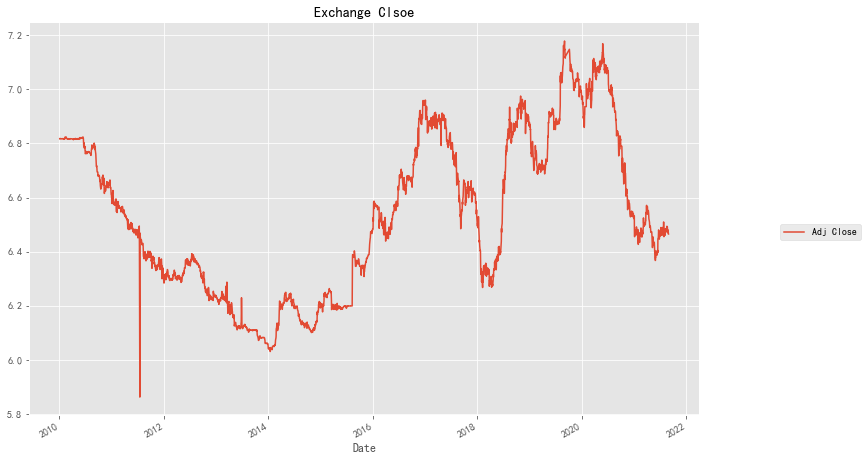

In [7]:
exchange['Adj Close'].plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Exchange Clsoe")
sns.despine()

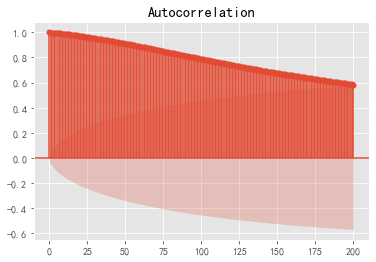

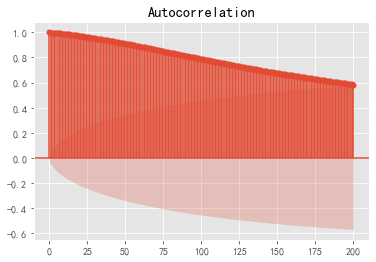

In [8]:
plot_acf(exchange['Adj Close'], lags=200)

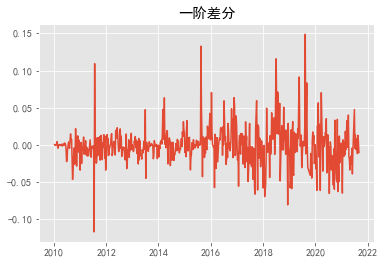

In [9]:
# 对数据进行平稳化操作
exchange_diff = exchange_train.diff()
exchange_diff = exchange_diff.dropna()

plt.figure()
plt.plot(exchange_diff)
plt.title('一阶差分')
plt.show()

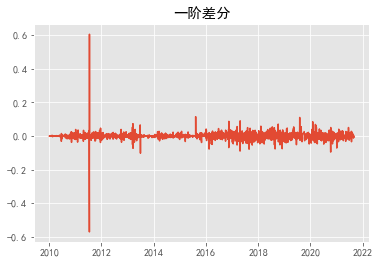

In [10]:
# 对数据进行平稳化操作
exchange_diff = exchange['Adj Close'].diff()
exchange_diff = exchange_diff.dropna()

plt.figure()
plt.plot(exchange_diff)
plt.title('一阶差分')
plt.show()

In [11]:
ts.adfuller(exchange_diff)

(-26.546214324689913,
 0.0,
 4,
 3010,
 {'1%': -3.432524380568614,
  '5%': -2.8625007013501316,
  '10%': -2.567281406386243},
 -14892.552751162686)

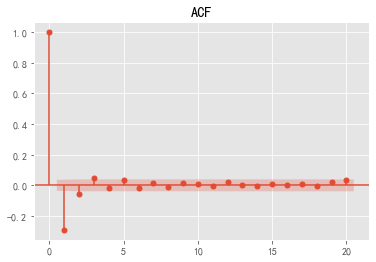

In [12]:
# 用于决定Q的值
acf = plot_acf(exchange_diff, lags=20)
plt.title('ACF')
acf.show()

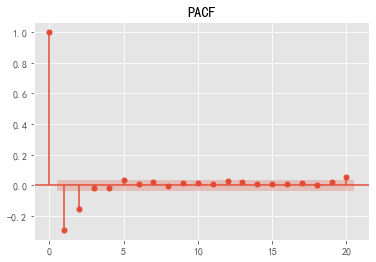

In [13]:
# 用于决定P的值
pacf = plot_pacf(exchange_diff, lags=20)
plt.title('PACF')
pacf.show()

In [14]:
# ADF单位根检验


In [15]:
exchange_train[np.isnan(exchange_train)] = 7
exchange_train[np.isinf(exchange_train)] = 7
model = ARIMA(exchange_train, order=(1,1,1), freq='W-MON')

In [16]:
result = model.fit()
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                  608
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1362.367
Method:                       css-mle   S.D. of innovations              0.026
Date:                Mon, 27 Sep 2021   AIC                          -2716.734
Time:                        14:06:28   BIC                          -2699.094
Sample:                    01-11-2010   HQIC                         -2709.871
                         - 08-30-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0006      0.002     -0.316      0.752      -0.004       0.003
ar.L1.D.Adj Close     0.8197      0.090      9.104      0.000       0.643       0.996
ma.L1.D.Adj Close    -0.

In [17]:
pred = result.predict('20190408', '20210831', dynamic=True, typ='levels')
print(pred)

2019-04-08    6.719284
2019-04-15    6.718842
2019-04-22    6.718380
2019-04-29    6.717900
2019-05-06    6.717406
                ...   
2021-08-09    6.651826
2021-08-16    6.651267
2021-08-23    6.650709
2021-08-30    6.650151
2021-09-06    6.649593
Freq: W-MON, Length: 127, dtype: float64


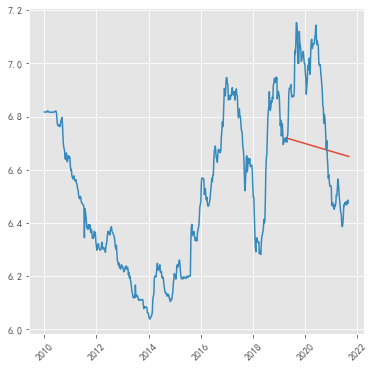

In [18]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(exchange_train)

In [19]:
exchange.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.0
mean,6.528957,6.537999,6.518336,6.529344,6.529344,0.0
std,0.291585,0.291673,0.299106,0.291202,0.291202,0.0
min,5.863000,6.040000,2.201500,5.863000,5.863000,0.0
25%,6.284625,6.297075,6.273600,6.286050,6.286050,0.0
50%,6.493600,6.503550,6.484050,6.494700,6.494700,0.0
75%,6.791875,6.804450,6.784375,6.792025,6.792025,0.0
max,7.478400,7.481000,7.162000,7.178000,7.178000,0.0


In [20]:
exchange_train

Date
2010-01-04    6.81690
2010-01-11    6.81742
2010-01-18    6.81684
2010-01-25    6.81714
2010-02-01    6.81688
               ...   
2021-08-02    6.47932
2021-08-09    6.46764
2021-08-16    6.48060
2021-08-23    6.48544
2021-08-30    6.47522
Freq: W-MON, Name: Adj Close, Length: 609, dtype: float64

In [21]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(exchange['Adj Close'],
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.fit(exchange['Adj Close'])
print(model.summary())

# Forecast
n_periods = 24
fc = model.predict(n_periods=len(exchange['Adj Close']))
index_of_fc = np.arange(len(exchange['Adj Close']), len(exchange['Adj Close'])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(exchange['Adj Close'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15067.883, Time=2.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14732.796, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14997.855, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15063.007, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14734.703, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15069.361, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15063.351, Time=2.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15061.080, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-15068.765, Time=5.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-15070.981, Time=1.93 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-15072.750, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-15065.097, Time=0.70 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-15070.417, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-15071.109, Time=1.27 sec

Best

ValueError: Length of passed values is 3016, index implies 24.

In [ ]:
# 1,1,2 ARIMA Model
model = ARIMA(exchange['Adj Close'], order=(0,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

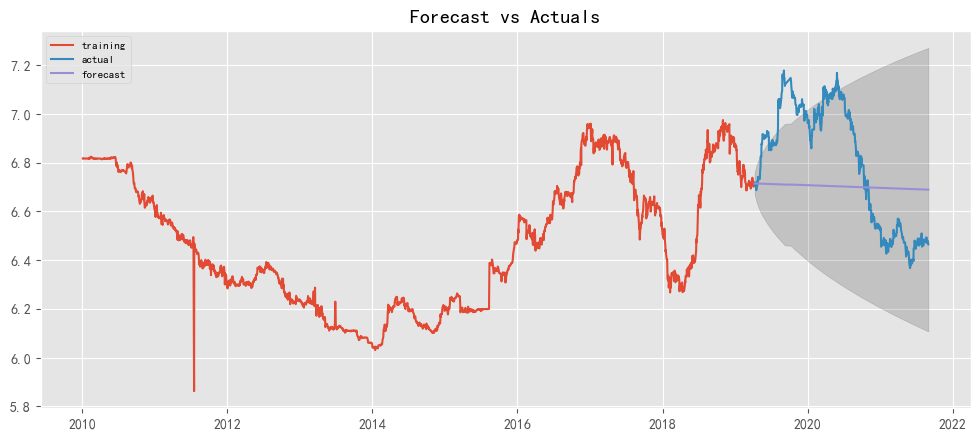

In [22]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = exchange['Adj Close'][:int(len(exchange['Adj Close'])*0.8)]
test = exchange['Adj Close'][int(len(exchange['Adj Close'])*0.8):]

# Build Model
# model = ARIMA(train, order=(0,1,3))  
model = ARIMA(train, order=(0, 1, 3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(604, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [23]:
model_fit.plot_predict(dynamic=False)
plt.show()

NameError: name 'model_fit' is not defined

In [24]:
exchange['Adj Close'][:int(len(exchange['Adj Close'])*0.7)]

Date
2010-01-04    6.8169
2010-01-05    6.8170
2010-01-06    6.8183
2010-01-07    6.8178
2010-01-08    6.8175
               ...  
2018-02-05    6.3076
2018-02-06    6.2897
2018-02-07    6.2825
2018-02-08    6.2676
2018-02-09    6.3263
Name: Adj Close, Length: 2111, dtype: float64

In [25]:
exchange['Adj Close'][int(len(exchange['Adj Close'])*0.8):]

Date
2019-04-09    6.7154
2019-04-10    6.7108
2019-04-11    6.7154
2019-04-12    6.7185
2019-04-15    6.7032
               ...  
2021-08-25    6.4699
2021-08-26    6.4749
2021-08-27    6.4805
2021-08-30    6.4708
2021-08-31    6.4651
Name: Adj Close, Length: 604, dtype: float64

In [26]:
exchange.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-23',
               '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
               '2021-08-30', '2021-08-31'],
              dtype='datetime64[ns]', name='Date', length=3016, freq=None)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
mae = mean_absolute_error(test, pred)
mse = mean_squared_error(test, pred)
evs = explained_variance_score(test, pred)
r2 = r2_score(test, pred)
print("MAE：", mae)
print("MSE：", mse)
print("EVS：", evs)
print("R2：", r2)

ValueError: Found input variables with inconsistent numbers of samples: [604, 127]